# TASK 1: UNDERSTAND THE PROBLEM STATEMENT

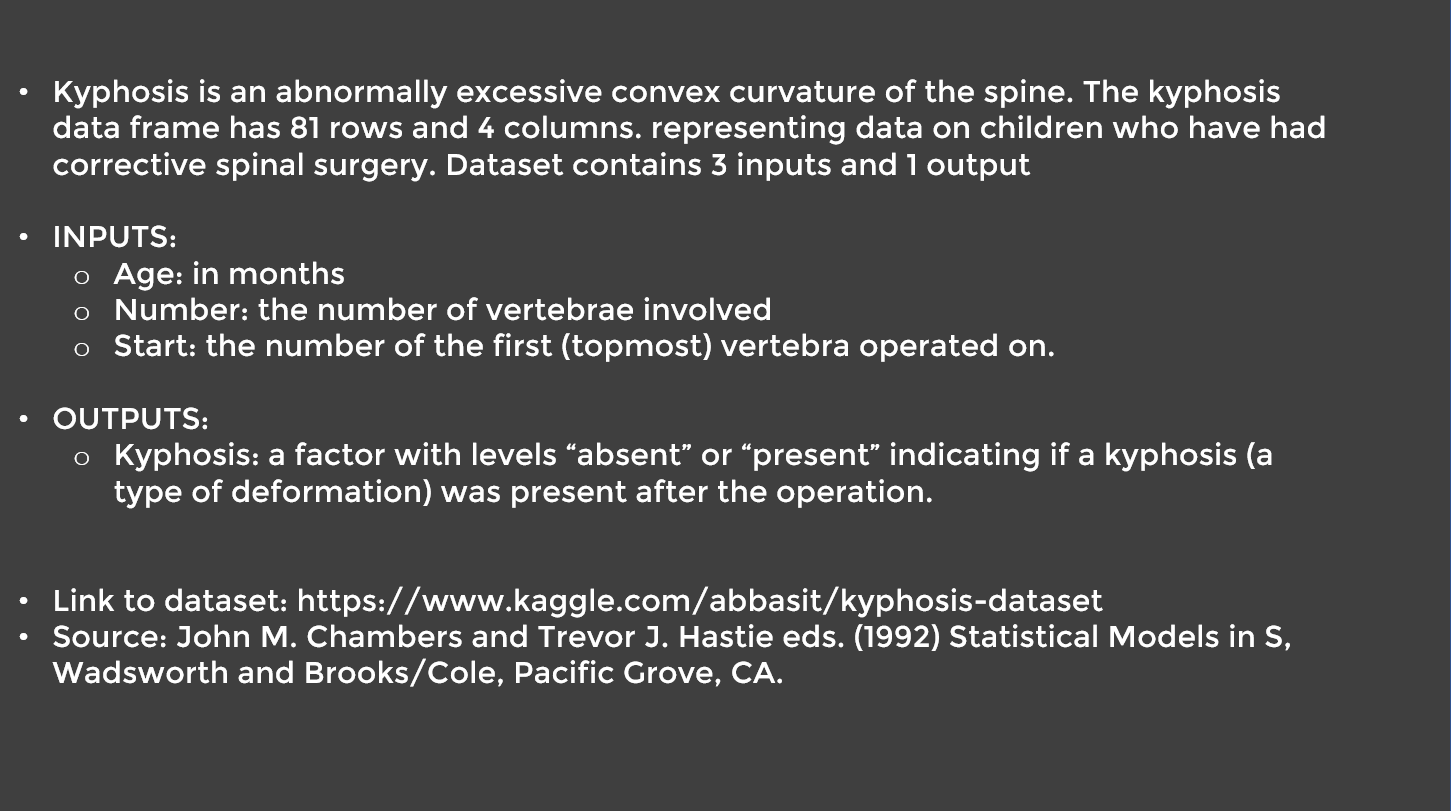

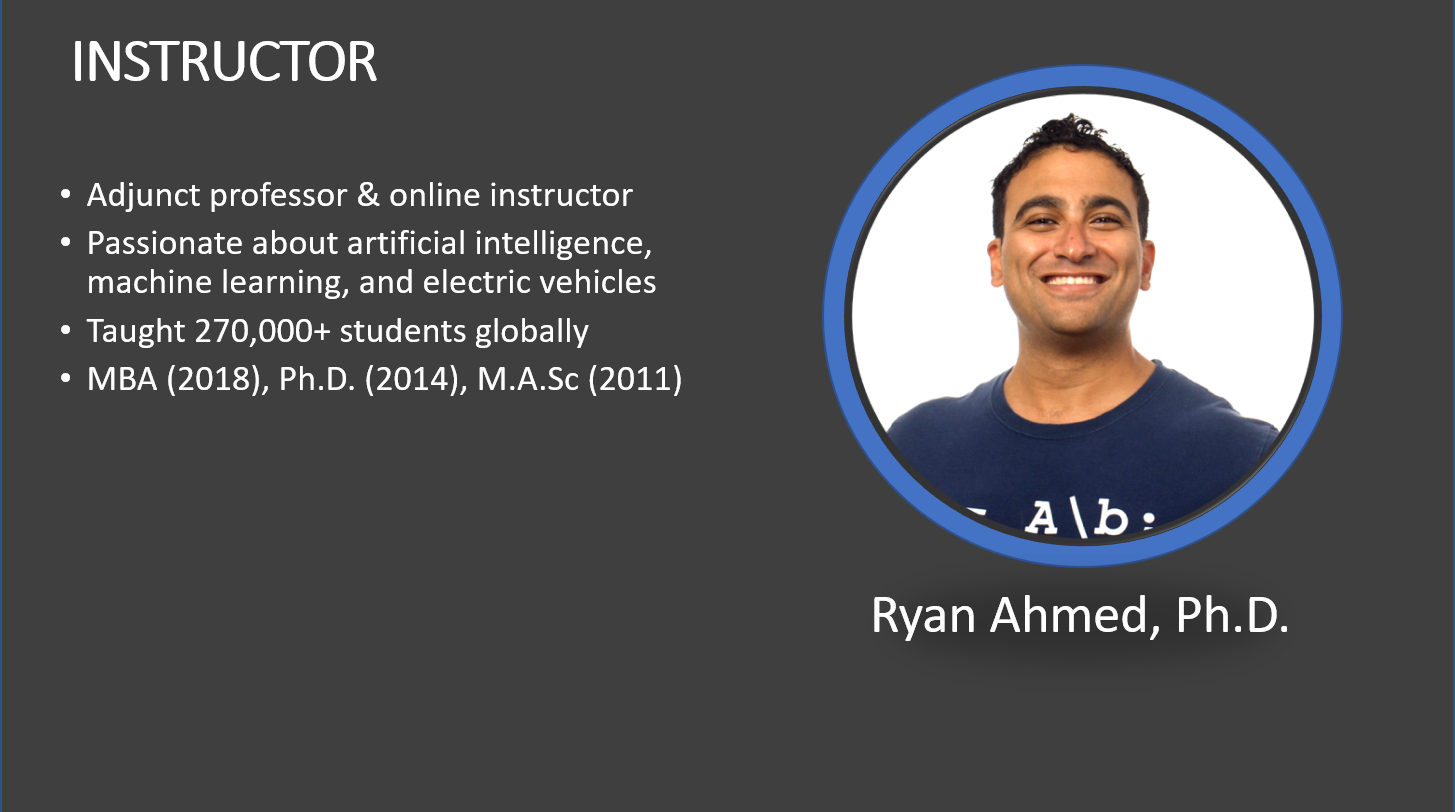

# TASK #2: IMPORT LIBRARIES AND DATASETS


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [22]:
Kyphosis_df=pd.read_csv('kyphosis.csv')

In [23]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [24]:
Kyphosis_df.tail(7)

,Kyphosis,Age,Number,Start
74,absent,11,3,15
75,absent,178,4,15
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [25]:
Kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **List the average, minimum and maximum age (in years) considered in this study using two different methods**

In [26]:
Kyphosis_df['Age'].mean()/12

6.97119341563786

In [27]:
Kyphosis_df['Age'].min()/12

0.08333333333333333

In [28]:
Kyphosis_df['Age'].max()/12

17.166666666666668

In [29]:
Kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


# TASK #3: PERFORM DATA VISUALIZATION

In [30]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
Kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(Kyphosis_df['Kyphosis'])

In [32]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [33]:
Kyphosis_True = Kyphosis_df[Kyphosis_df['Kyphosis']==1]

In [34]:
Kyphosis_False = Kyphosis_df[Kyphosis_df['Kyphosis']==0]

In [35]:
print( 'Disease present after operation percentage =', (len(Kyphosis_True) / len(Kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


<AxesSubplot: >

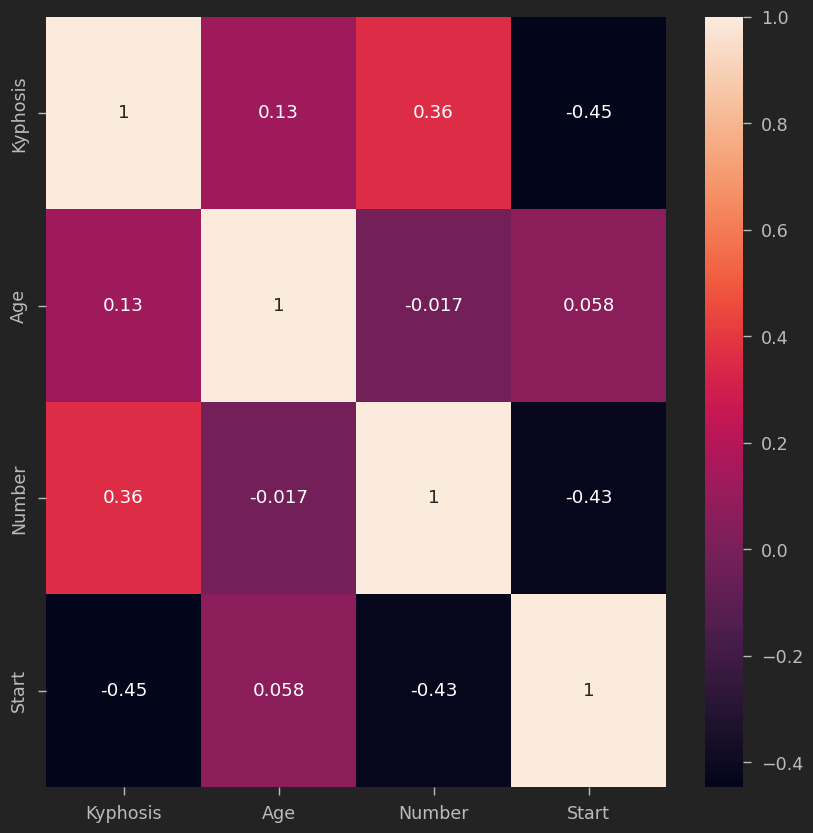

In [36]:
plt.figure(figsize=(10,10)) 
sns.heatmap(kyphosis_df.corr(),annot=True)

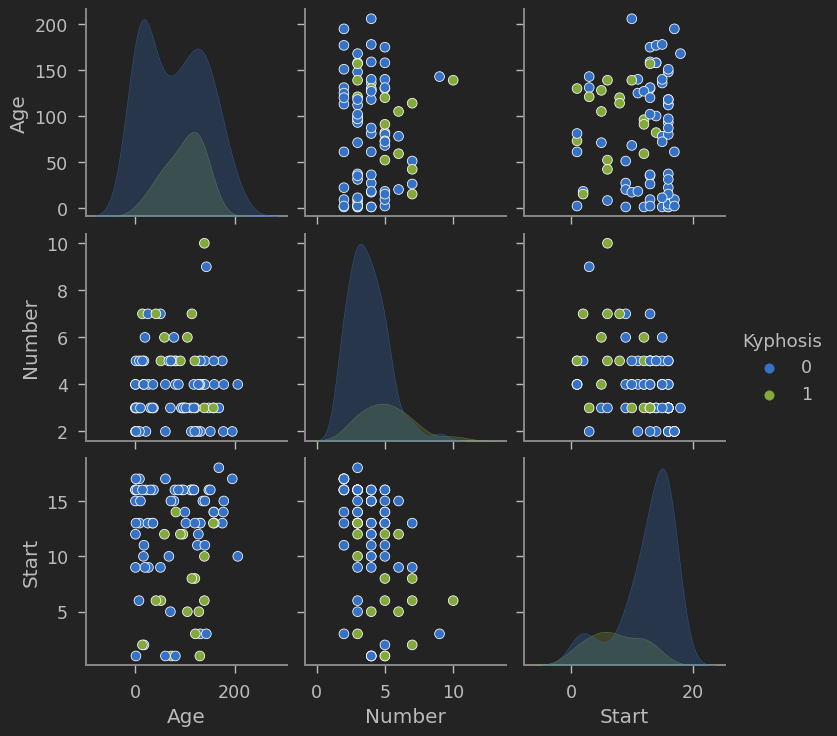

In [39]:
sns.pairplot(kyphosis_df, hue='Kyphosis')

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Plot the data countplot showing how many samples belong to each class**

<AxesSubplot: xlabel='Kyphosis', ylabel='count'>

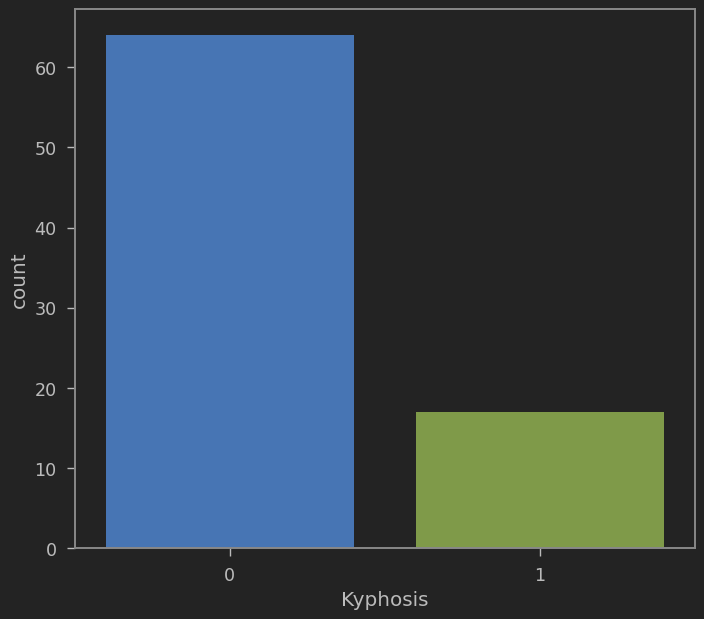

In [40]:
sns.countplot(x=kyphosis_df['Kyphosis'])

# TASK #4: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [41]:
# Let's drop the target label coloumns
X=kyphosis_df.drop(['Kyphosis'],axis=1)
y=kyphosis_df['Kyphosis']

In [42]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [43]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2)

In [46]:
X_train.shape

(64, 3)

In [47]:
X_test.shape

(17, 3)

In [48]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


# TASK #5: TRAIN A LOGISTIC REGRESSION CLASSIFIER MODEL

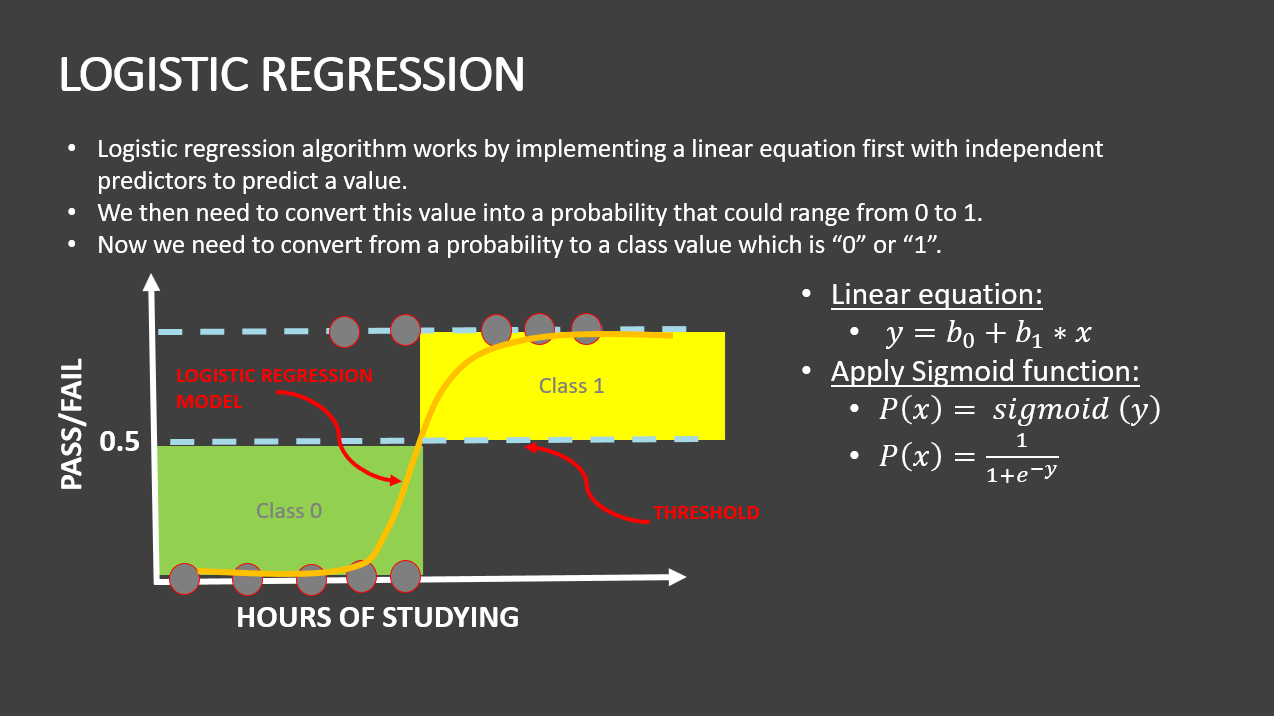

In [49]:
X_train.shape

(64, 3)

In [50]:
y_train.shape

(64,)

In [51]:
X_test.shape

(17, 3)

In [52]:
y_test.shape

(17,)

In [54]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

# TASK #6: EVALUATE TRAINED MODEL PERFORMANCE 

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot: >

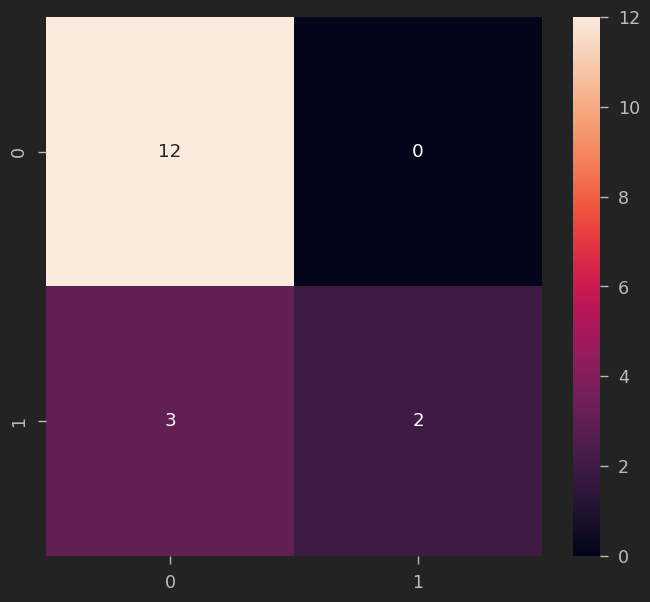

In [57]:
# Predicting the Test set results
y_predict_test=model.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [58]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.40      0.57         5

    accuracy                           0.82        17
   macro avg       0.90      0.70      0.73        17
weighted avg       0.86      0.82      0.80        17



# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND DECISION TREES AND RANDOM FOREST CLASSIFIER MODELS

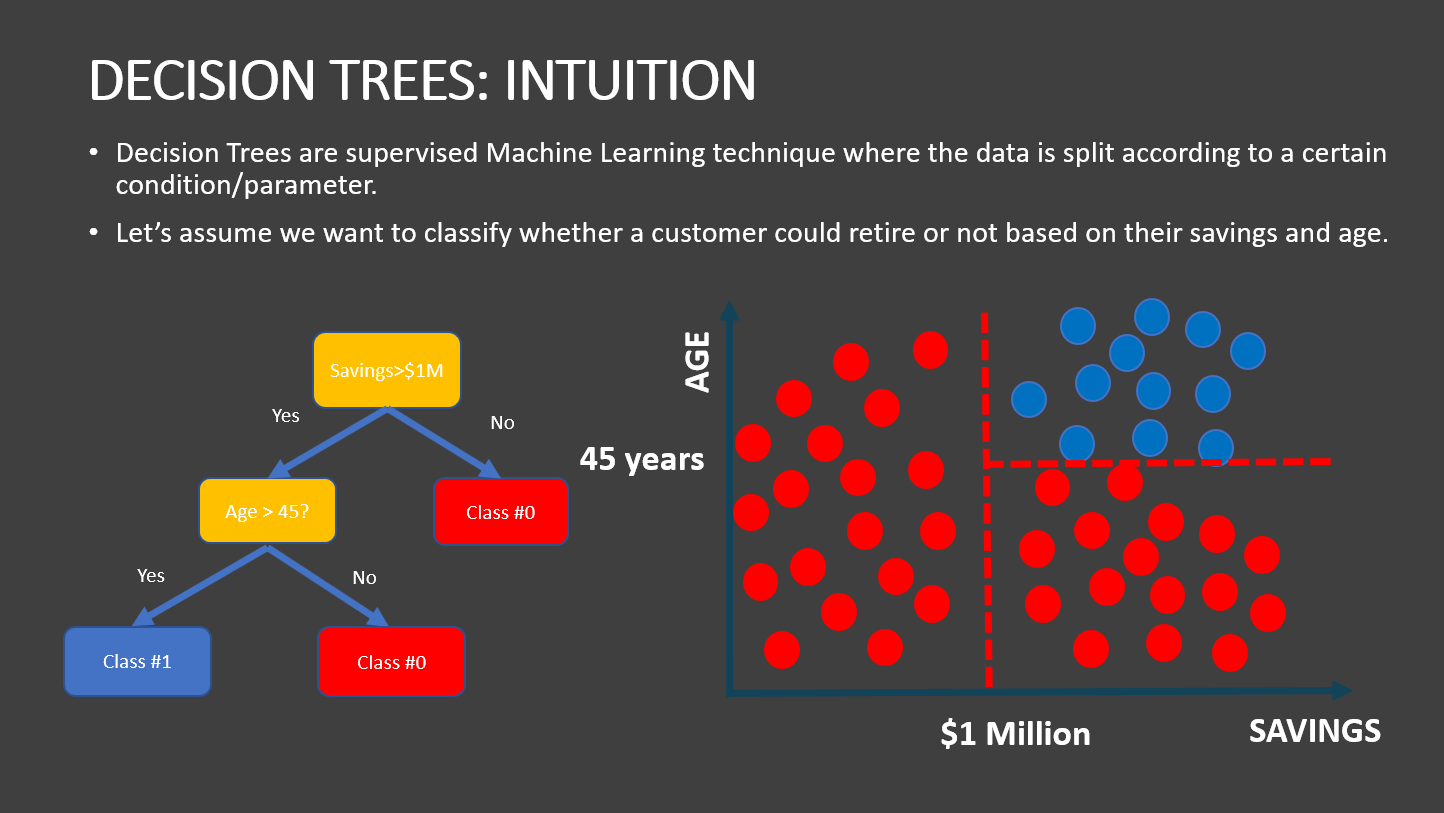

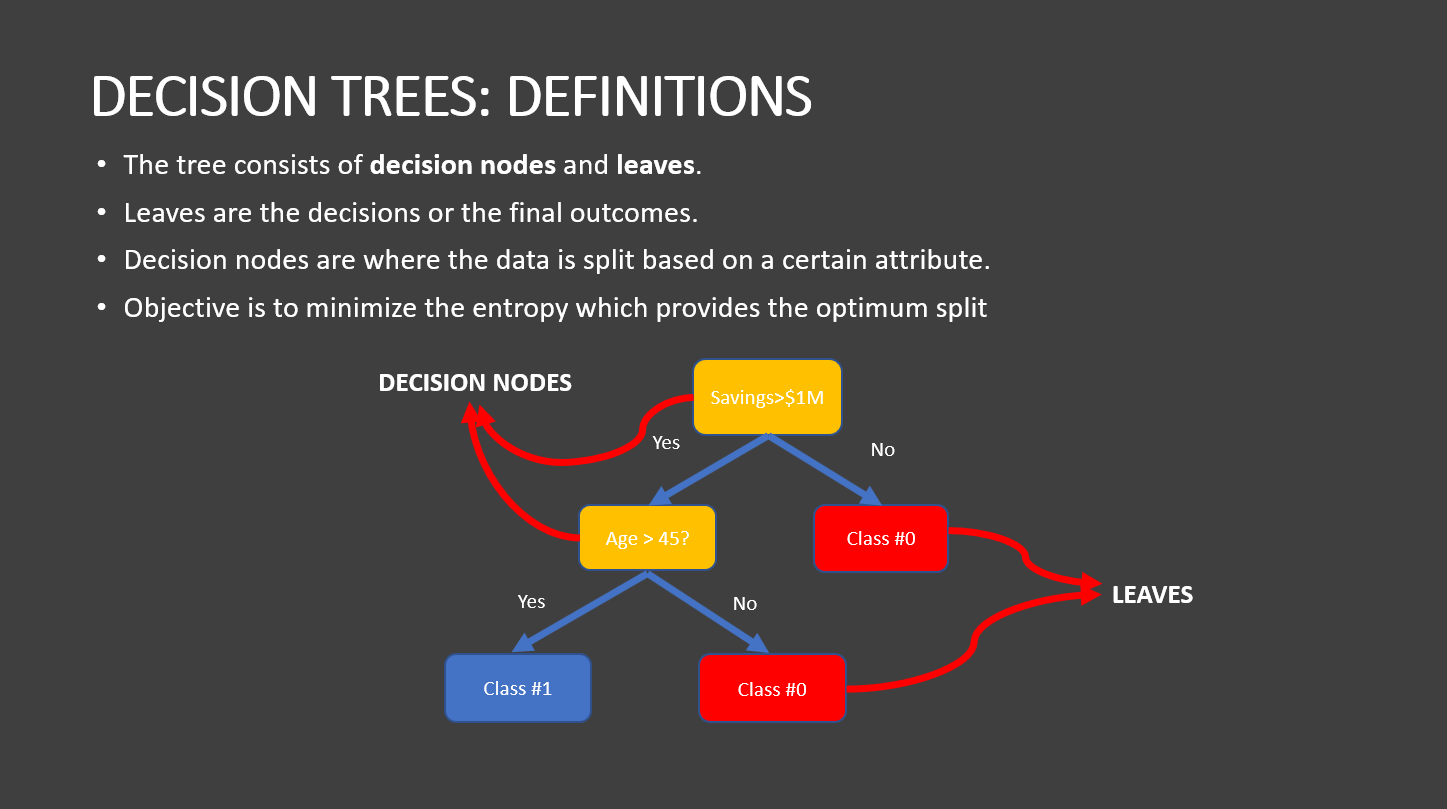

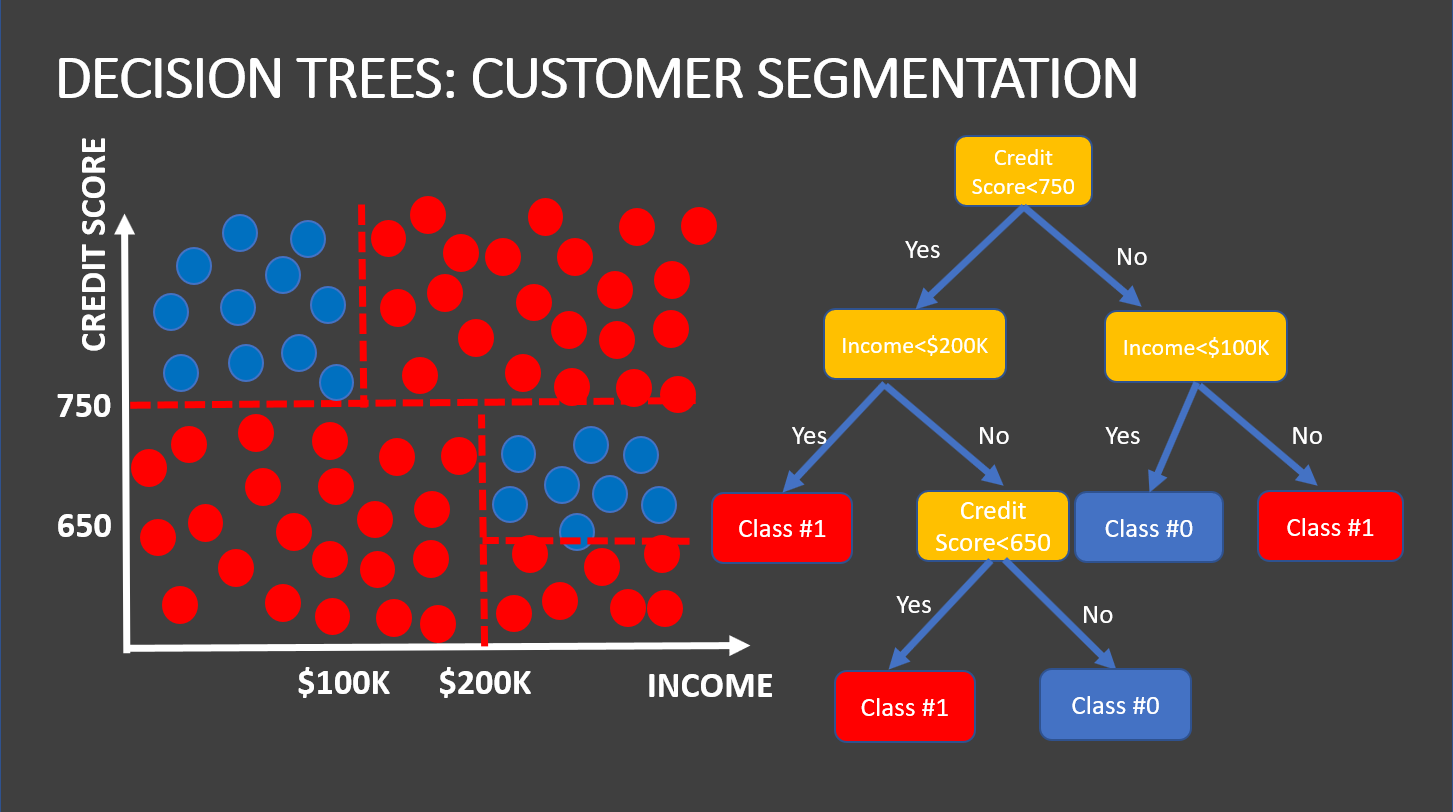

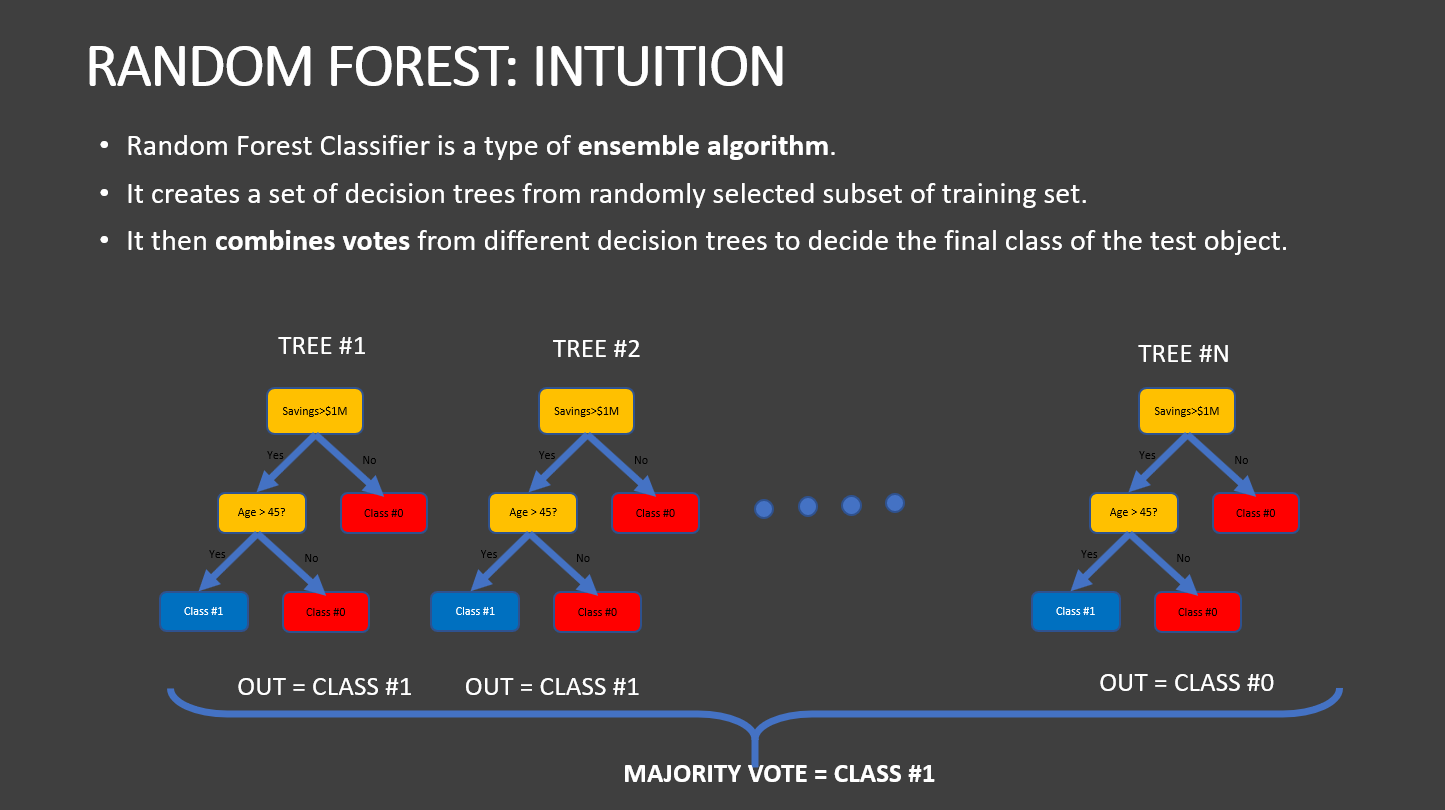

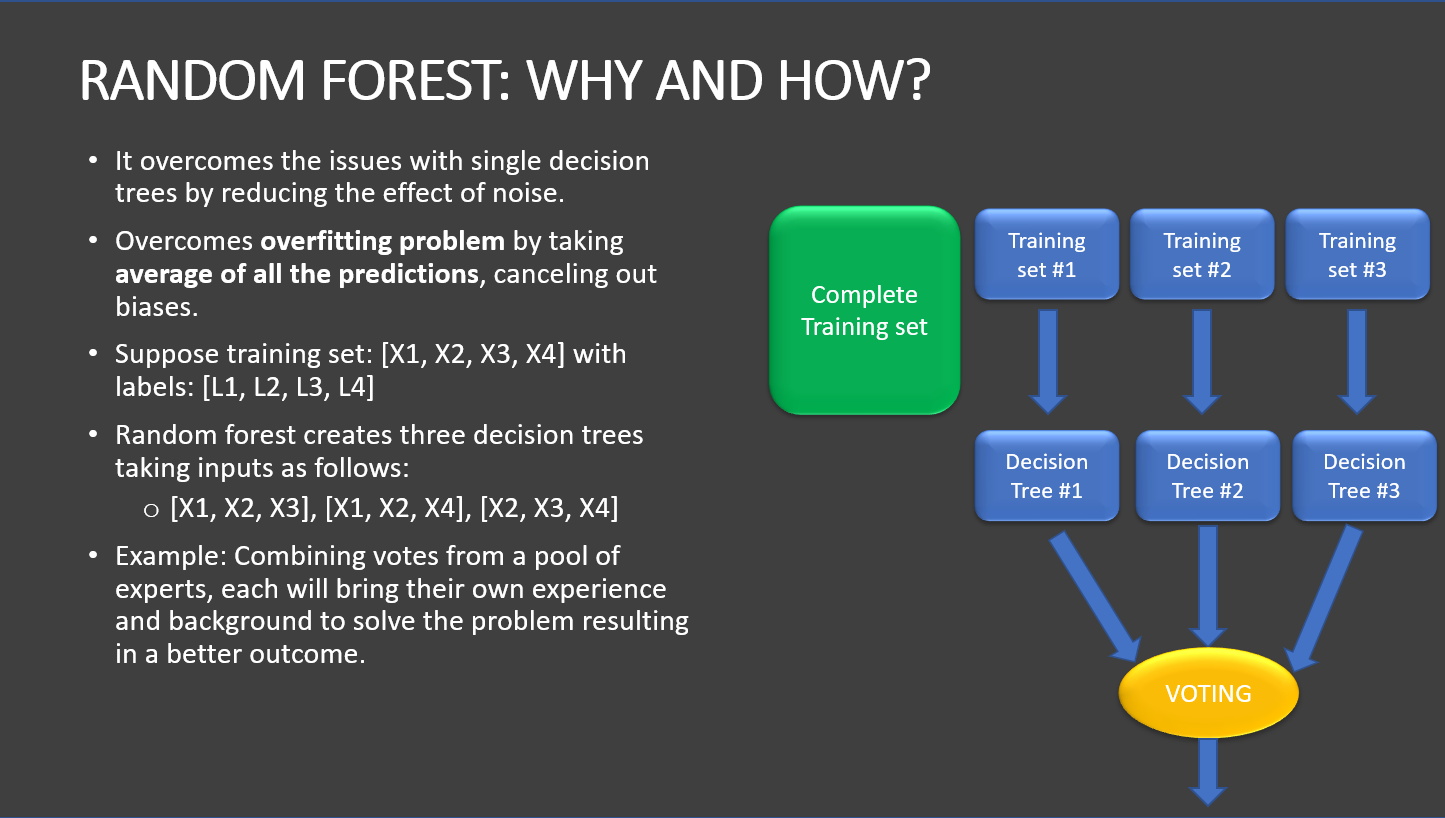

# TASK #8: IMPROVE THE MODEL 

In [60]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

<AxesSubplot: >

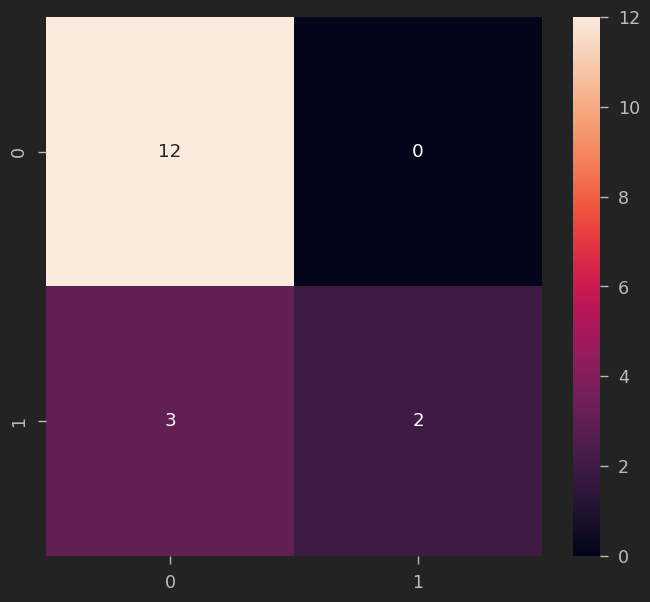

In [61]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [62]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.40      0.57         5

    accuracy                           0.82        17
   macro avg       0.90      0.70      0.73        17
weighted avg       0.86      0.82      0.80        17



In [63]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

        importance
Start     0.501018
Age       0.314001
Number    0.184982


**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Train a random forest classifier model and assess its performance**
- **Plot the confusion matrix**
- **Print the classification Report**


              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       0.00      0.00      0.00         5

    accuracy                           0.71        17
   macro avg       0.35      0.50      0.41        17
weighted avg       0.50      0.71      0.58        17



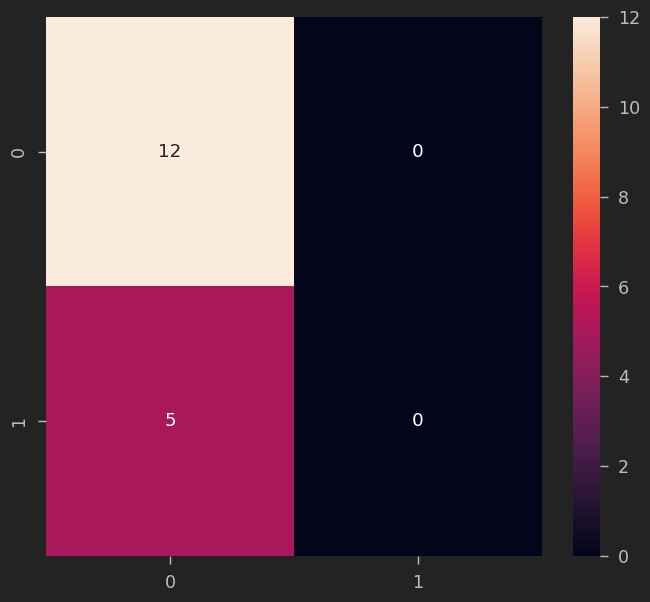

In [64]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

# GREAT JOB! 

# PRACTICE OPPORTUNITIES SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **List the average, minimum and maximum age (in years) considered in this study using two different methods**

In [31]:
Kyphosis_df.describe()

,Kyphosis,Age,Number,Start
count,81.000000,81.000000,81.000000,81.000000
mean,0.209877,83.654321,4.049383,11.493827
std,0.409758,58.104251,1.619423,4.883962
min,0.000000,1.000000,2.000000,1.000000
25%,0.000000,26.000000,3.000000,9.000000
50%,0.000000,87.000000,4.000000,13.000000
75%,0.000000,130.000000,5.000000,16.000000
max,1.000000,206.000000,10.000000,18.000000


In [32]:
Kyphosis_df['Age'].mean()/12

6.97119341563786

In [33]:
Kyphosis_df['Age'].min()/12

0.08333333333333333

In [34]:
Kyphosis_df['Age'].max()/12

17.166666666666668

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Plot the data countplot showing how many samples belong to each class**

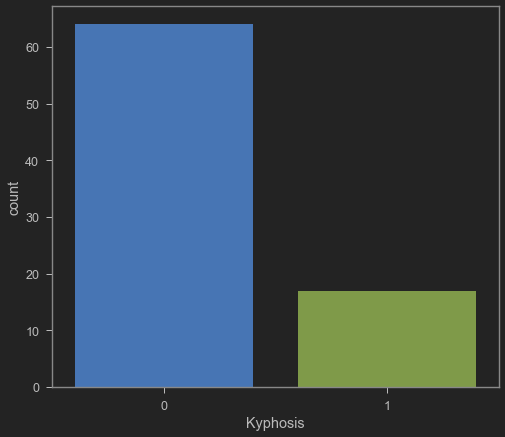

In [35]:
sns.countplot(x = Kyphosis_df['Kyphosis'], label = "Count");

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Train a random forest classifier model and assess its performance**
- **Plot the confusion matrix**
- **Print the classification Report**


              precision    recall  f1-score   support

           0       0.62      0.91      0.74        11
           1       0.00      0.00      0.00         6

    accuracy                           0.59        17
   macro avg       0.31      0.45      0.37        17
weighted avg       0.40      0.59      0.48        17



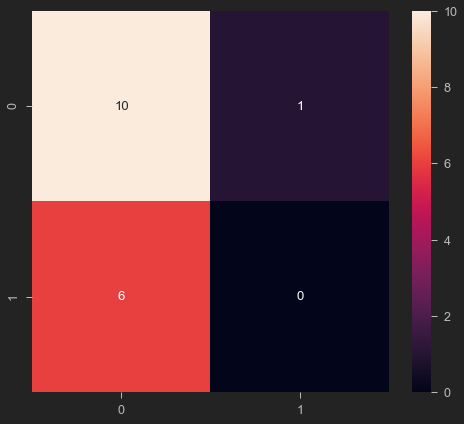

In [36]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))